In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from numpy import mean
from numpy import std
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import LocalOutlierFactor

C:\Users\Myra\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Myra\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Myra\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)
C:\Users\Myra\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
### Load dataset csv file

df=pd.read_csv("diabetes.csv")

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedig

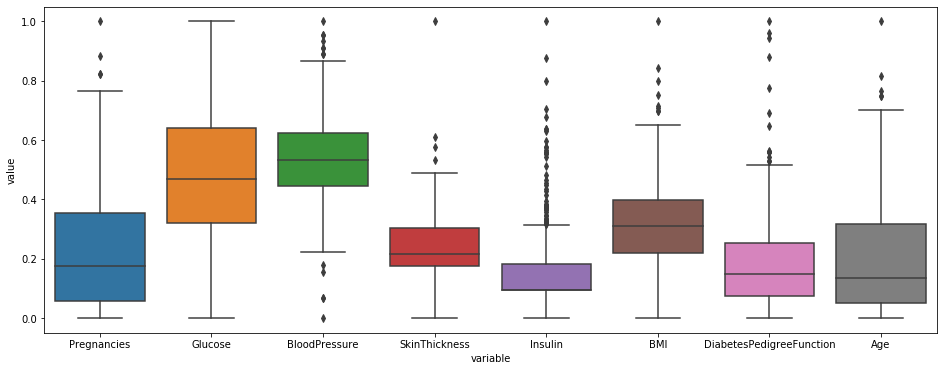

(530, 9)
(477, 9)


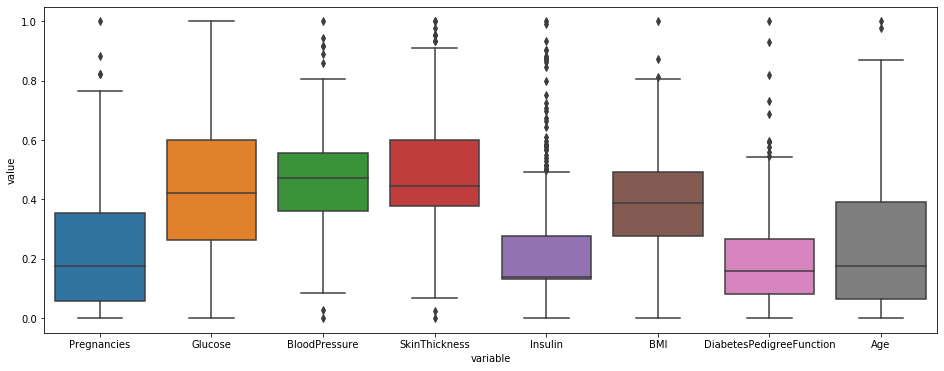

In [3]:
### Inspect for missing values
print(df.isna().sum())

### Dataset descriptive analysis
print(df.describe())

### Handling incorrect glucose, blood pressure, skin thickness, insulin and bmi values
mask=((df.Glucose==0) | (df.BloodPressure==0) | (df.SkinThickness==0) | (df.Insulin==0) | (df.BMI==0)) & (df.Outcome==0)
df=df[mask!=True]

### Mean imputation of incorrect values
df.loc[df.Glucose==0,"Glucose"]=df.Glucose.median()
df.loc[df.BMI==0,"BMI"]=df.BMI.mean()
df.loc[df.BloodPressure==0,"BloodPressure"]=df.BloodPressure.mean()
df.loc[df.Insulin==0,"Insulin"]=df.Insulin.median()
df.loc[df.SkinThickness==0,"SkinThickness"]=df.SkinThickness.median()


### Normalizing data to get all values in 0-1 range
x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled,columns=df.columns)


### Inspecting data for outliers using box plot
plt.figure(figsize=(16, 6))

sns.boxplot(x="variable", y="value", data=pd.melt(df.loc[:,df.columns!="Outcome"]))

plt.show()

x_inversed = min_max_scaler.inverse_transform(df.values)
df = pd.DataFrame(x_inversed,columns=df.columns)


### Removing outliers with Local Outlier Factor

X=df.loc[:,df.columns!="Outcome"].values
lof = LocalOutlierFactor(contamination=0.1)
yhat = lof.fit_predict(X)

mask = yhat != -1
print(df.shape)
df=df[mask]
print(df.shape)

### Plotting box plot for checking the removal of outliers

x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled,columns=df.columns)

plt.figure(figsize=(16, 6))

sns.boxplot(x="variable", y="value", data=pd.melt(df.loc[:,df.columns!="Outcome"]))

plt.show()

x_inversed = min_max_scaler.inverse_transform(df.values)
df = pd.DataFrame(x_inversed,columns=df.columns)


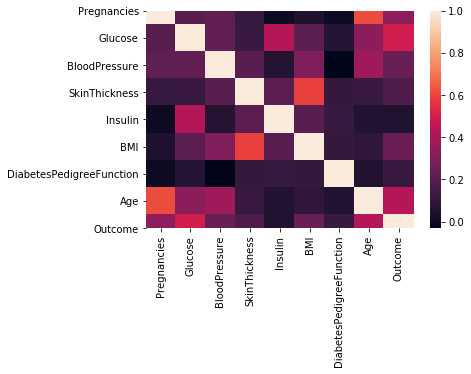

In [4]:
### Correlation of variables in dataset
corr = df.corr()
corr.style.background_gradient()

sns.heatmap(df.corr())


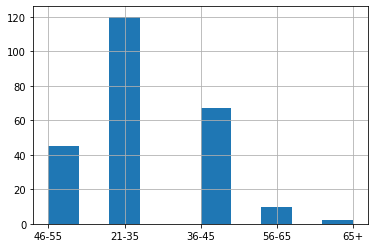

In [5]:
### Defining age groups for data analysis

def get_age_group(x):
    if((x>=21) & (x<=35)):
        return "21-35"
    if((x>35) & (x<=45)):
        return "36-45"
    if((x>45) & (x<=55)):
        return "46-55"
    if((x>55) & (x<=65)):
        return "56-65"
    if((x>65)):
        return "65+"
df["AgeGroups"]=df.Age.apply(lambda x: get_age_group(x))
outcome=df.Outcome
df.drop("Outcome",axis=1,inplace=True)
df["Outcome"]=outcome

### Dataset Analysis - Age Groups and Outcome
df[df.Outcome==1].AgeGroups.hist()
plt.show()


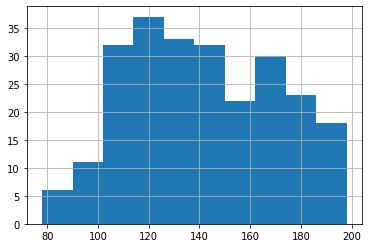

In [6]:
### Dataset Analysis - Glucose and Outcome
df[df.Outcome==1].Glucose.hist()


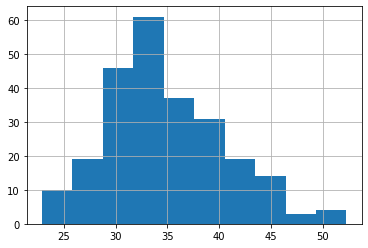

In [7]:

### Dataset Analysis - BMI and Outcome
df[df.Outcome==1].BMI.hist()

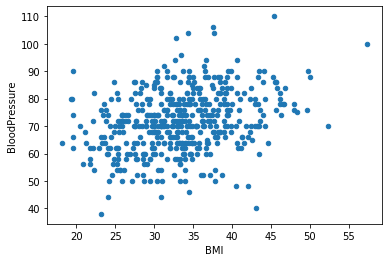

In [8]:

### Dataset Analysis - Blood Pressure and BMI
df.plot.scatter(x='BMI',y='BloodPressure')


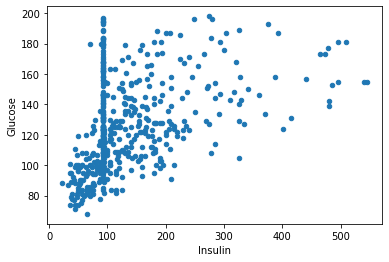

In [9]:

### Dataset Analysis - Glucose and Insulin
df.plot.scatter(x='Insulin',y='Glucose')

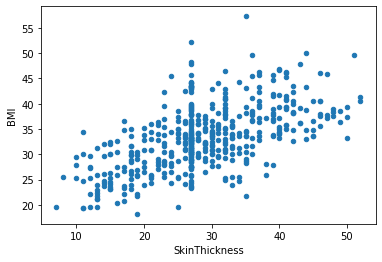

In [10]:



### Dataset Analysis - Skin Thickness and BMI
df.plot.scatter(x='SkinThickness',y='BMI')

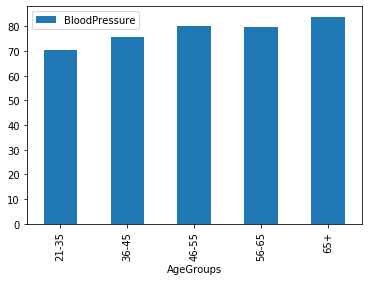

In [11]:
### Dataset Analysis - Age Groups and Blood Pressure
df[df.Outcome==1].groupby("AgeGroups",as_index=False).mean().plot.bar(x="AgeGroups",y="BloodPressure")

Outcome        0.0  1.0
Glucose Level          
High            29  117
Normal         204  127
9.475653090483853e-17


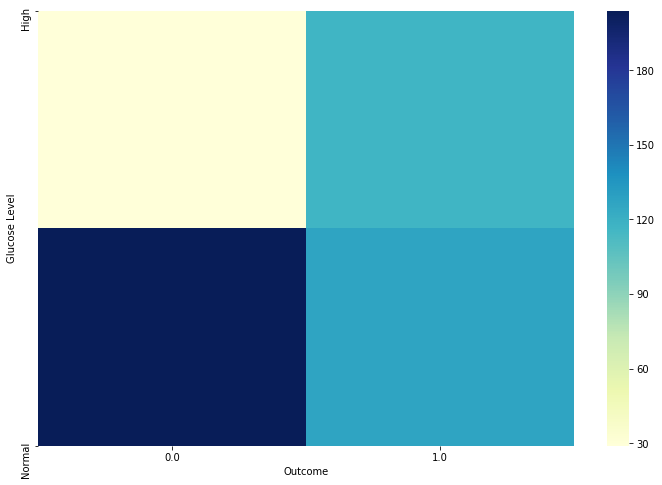

In [12]:

# https://towardsdatascience.com/easy-data-science-with-r-and-python-diabetes-among-the-pima-indians-an-exploratory-analysis-d7bc321d0fa7
# * Hypoglycemia (Low Blood Sugar) - <2.2 mmol/L
# * Normal/No Diabetes - >=2.2 mmol/L - <=7.8mmol/L
# * Prediabetes (Hyperglycemia / High Blood Sugar) - >7.8 mmol/L - <=11.1 mmol/L
# * Diabetes - >11.1 mmol/L


#### The unit of measurement for the 2-hour OGTT in this dataset is assumed to be in milligrams per deciliter (mg/dl). It can be converted to Milimoles per liter (mmol/l)
def get_glucose_level(x):
    if(x<2.2):
        return "Low"
    if((x>=2.2) & (x<=7.8)):
        return "Normal"
    if(x>7.8):
        return "High"
df["Glucose Level"]=df.Glucose.apply(lambda x : get_glucose_level(x*0.0555))


### Hypothesis 1 - Testing
from scipy.stats import chi2_contingency
contigency_glucose_outcome= pd.crosstab(df['Glucose Level'], df['Outcome'])
c, p, dof, expected = chi2_contingency(contigency_glucose_outcome)

print(contigency_glucose_outcome)
plt.figure(figsize=(12,8))
sns.heatmap(contigency_glucose_outcome, cmap="YlGnBu")
print(p)

2.9999999999999996
Outcome          0.0  1.0
Pregnancies > 3          
False            166   99
True              67  145
3.003625652604035e-11


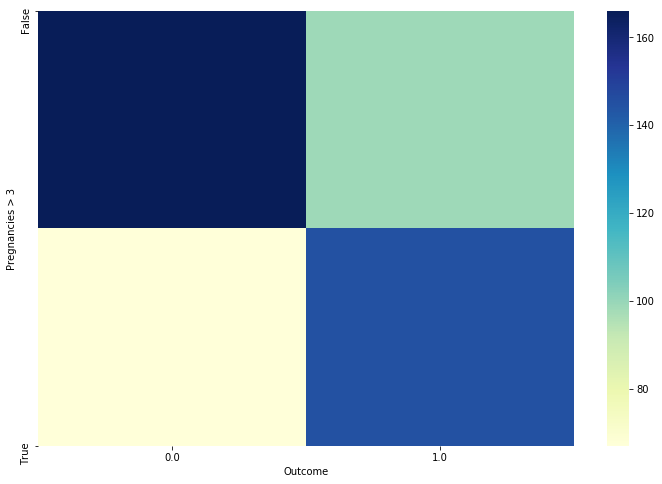

In [13]:
### Hypothesis 2 - Testing
print(df.Pregnancies.median())

df["Pregnancies > 3"]=df.Pregnancies.apply(lambda x: x>3)

contigency_pregnancy_outcome= pd.crosstab(df['Pregnancies > 3'], df['Outcome'])
c, p, dof, expected = chi2_contingency(contigency_pregnancy_outcome)

print(contigency_pregnancy_outcome)
plt.figure(figsize=(12,8))
sns.heatmap(contigency_pregnancy_outcome, cmap="YlGnBu")
print(p)

Outcome         0.0  1.0
Weight Level            
Normal           37    7
Obese           115  160
Overweight       58   35
Severely Obese   23   42
1.88831815397378e-08


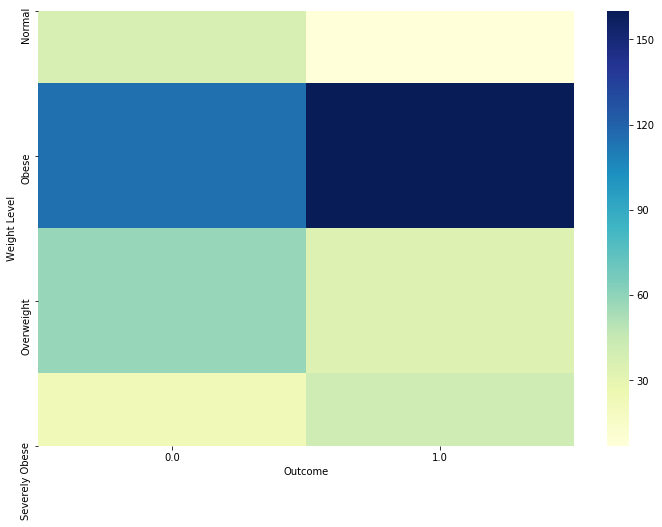

In [14]:
### Hypothesis 3 - Testing
def get_weight_level(x):
    if((x>=18) & (x<=24.9) ):
        return "Normal"
    if((x>=25) & (x<=29.9)):
        return "Overweight"
    if((x>=30) & (x<=39.9)):
        return "Obese"
    if((x>=40)):
        return "Severely Obese"
df["Weight Level"]=df.BMI.apply(lambda x: get_weight_level(x))

contigency_bmi_outcome= pd.crosstab(df['Weight Level'], df['Outcome'])
c, p, dof, expected = chi2_contingency(contigency_bmi_outcome)

print(contigency_bmi_outcome)
plt.figure(figsize=(12,8))
sns.heatmap(contigency_bmi_outcome, cmap="YlGnBu")
print(p)

In [15]:
df.drop(["AgeGroups","Glucose Level","Pregnancies > 3","Weight Level"],axis=1,inplace=True)


In [16]:
### Model Training and Evaluation
x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled,columns=df.columns)

X = df.loc[:,df.columns!="Outcome"].values
y = df.loc[:,"Outcome"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1,stratify=y)


model = GradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('CV Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

model.fit(X_train, y_train)

y_pred=model.predict(X_test)
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test,y_pred))
print("Accuracy Score")
print(metrics.accuracy_score(y_test, y_pred))
print("Recall Score")
print(metrics.recall_score(y_test, y_pred))
print("F-1 Score")
print(metrics.f1_score(y_test, y_pred))

CV Accuracy: 0.852 (0.058)
Confusion Matrix
[[30 17]
 [ 8 41]]
Accuracy Score
0.7395833333333334
Recall Score
0.8367346938775511
F-1 Score
0.7663551401869159
